# ARIMA and Seasonal ARIMA
## Autoregressive Integrated Moving Averages 
#### The genral process for ARIMA model is following:
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA or Seasonal ARIMA based on the data 
- Use the model to make predictions

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df = df.dropna()

In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
df.columns = ['Month', 'Sales']

In [8]:
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
df.set_index('Month', inplace = True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

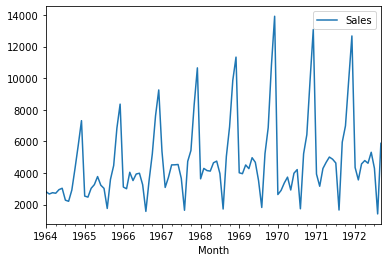

In [12]:
## the data looks seasonal
df.plot()

In [13]:
### testing for stationary 
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result = adfuller(df['Sales'])

In [15]:
## H0: It is non stationary 
## H1: It is stationry 

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic", "p-values", "#Lags Used", "Number of Observation Used"]
    for value, label in zip(result, labels):
        print(label + ":" + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0),reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time searies has a unit root, indiacating it is non-stationary")

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic:-1.8335930563276228
p-values:0.363915771660245
#Lags Used:11
Number of Observation Used:93
weak evidence against null hypothesis, time searies has a unit root, indiacating it is non-stationary


## Differencing

In [17]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [18]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [19]:
adfuller_test(df["Seasonal First Difference"].dropna())

ADF Test Statistic:-7.626619157213162
p-values:2.060579696813685e-11
#Lags Used:0
Number of Observation Used:92
Strong evidence against the null hypothesis(H0),reject the null hypothesis, Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

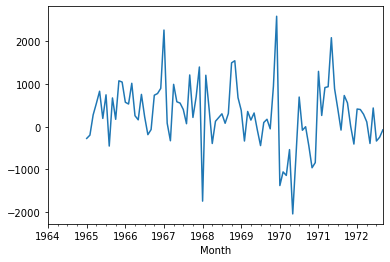

In [20]:
df["Seasonal First Difference"].plot()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
# df['Seasonal First Difference'].iloc[13:]

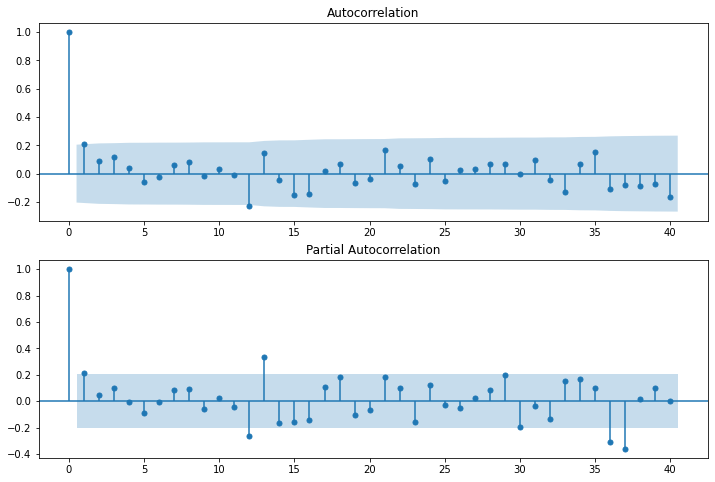

In [23]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags = 40, ax = ax2)